# Table of Contents
 <p><div class="lev1"><a href="#Synthetic-Raw-Data"><span class="toc-item-num">1&nbsp;&nbsp;</span>Synthetic Raw Data</a></div>

# Synthetic Raw Data

In [1]:
from IPython.display import display
from matplotlib import pyplot as plt

import matplotlib
import numpy as np
import pandas as pd

# matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

In [2]:
def gen_slope(width: int=400):
    f = lambda x: (-(x)**2 + 7)

    slope = [
        f(i) for i in np.linspace(-3, 3, width)
    ]
    slope -= min(slope)

    return slope

In [3]:
def translate_vehicle_layout_to_distance(layout: str):
    """
    :param layout: str ex: -O-O-------O--
    :return: tuple with axles distance (m) and vehicle lenght (m)
    
    """
    axles_distance = []
    _distance = 0
    
    layout = layout.upper()
    
    for c in layout:
        _distance += 50
        if c == 'O':
            axles_distance.append(_distance/100)
            _distance = 0

    return axles_distance[1:], len(layout)*50/100

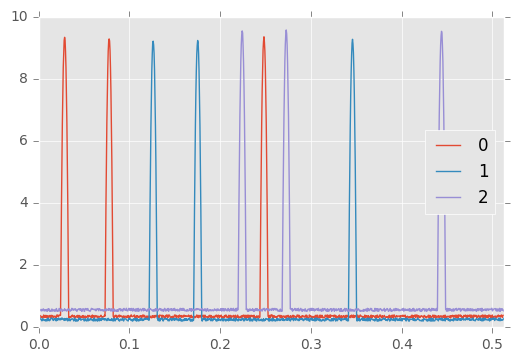

In [4]:
def gen_truck_raw_data(
    sample_rate: int, speed: float, vehicle_layout: str, 
    sensors_distance: list=[],
    p_signal_noise: float=10.0
) -> pd.DataFrame:
    """
    if sensors_distance is None return just one signal wave
    
    """
    axles_distance, vehicle_lenght = (
        translate_vehicle_layout_to_distance(vehicle_layout)
    )
    
    sensors_distance.insert(0, 0)
    axles_distance.insert(0, 0)
    
    total_seconds = (sum(sensors_distance)+vehicle_lenght)/speed
    total_points = int(sample_rate*total_seconds)+1
    total_seconds = total_points/sample_rate  # correction
    
    footprint = 50/100
    
    x = np.linspace(0, total_seconds, total_points)
    
    data = {}
    shift = 0.5
    Δd_cum = 0
    
    for i, Δd in enumerate(sensors_distance):
        Δd_cum += Δd
        y = np.zeros(total_points)
        axd_cum = 0
        for axd in axles_distance:
            axd_cum += axd
            j = int(((axd_cum+shift+Δd_cum)*sample_rate)//speed)
            #print(axd_cum, j, total_points)
            width = int(400//speed)
            y[j:j+width] = gen_slope(width)
        
        y += np.random.random(total_points)/p_signal_noise  # noise
        y += np.random.randint(0, 100)/70  # changes baseline
        
        data[i] = y
        
    return pd.DataFrame(data, index=x)

vehicle_layout = '-O-O------O--'

data = gen_truck_raw_data(
    sample_rate=2000, 
    speed=20.5, 
    vehicle_layout=vehicle_layout, 
    sensors_distance=[2, 2],
    p_signal_noise=10.0
)

data.plot()
plt.show()